## 1 환경 [날짜(요일, 공휴일)/날씨(비, 온도)/ 미세먼지] 데이터 전처리

### 날짜(요일, 공휴일)

In [74]:
# 데이터 불러오기
holiday = pd.read_csv("datas/holi.csv", encoding="euc-kr")

In [75]:
# date 형식 통일
holiday["date"] = holiday["date"].str.replace("-", "/")

# 결측치 처리
holiday = holiday.fillna(value=0)

# 불필요 컬럼 제거
holiday = holiday.drop(["datename"], axis=1)

In [76]:
holiday

,date,weekday,weekend
0,2017/01/01,Sunday,1.0
1,2017/01/02,Monday,0.0
2,2017/01/03,Tuesday,0.0
3,2017/01/04,Wednesday,0.0
4,2017/01/05,Thursday,0.0
...,...,...,...
1030,2019/10/27,Sunday,1.0
1031,2019/10/28,Monday,0.0
1032,2019/10/29,Tuesday,0.0
1033,2019/10/30,Wednesday,0.0


### 날씨(비, 기온)

In [77]:
# 데이터 불러오기
climate = pd.read_csv("datas/jamsil_cli.csv", encoding="utf-8")
climate.drop(["Unnamed: 0"], axis=1, inplace=True)

In [78]:
climate = climate.drop_duplicates(subset=['날짜'], keep='first')

In [79]:
# date 형식 통일
climate["날짜"] = climate["날짜"].apply(lambda data: str(
    data)[:4] + "/" + str(data)[4:6] + "/" + str(data)[6:])

# 컬럼 명 영문화
climate = climate.rename({"날짜": "date", "눈/비": "rainy"}, axis='columns')

# 기온 평균화
climate["mean_c"] = (climate["min_c"] + climate["max_c"])/2

# 불필요 컬럼 제거
climate = climate.drop(["행정구", "맑음", "min_c", "max_c"], axis=1)

In [80]:
climate

,date,rainy,mean_c
0,2017/01/01,0,2.5
2,2017/01/02,1,5.5
4,2017/01/03,0,3.0
6,2017/01/04,0,5.0
8,2017/01/05,0,3.5
...,...,...,...
1996,2019/09/26,0,23.5
1998,2019/09/27,0,23.5
2000,2019/09/28,0,24.0
2002,2019/09/29,0,23.5


### 미세먼지

In [41]:
# 데이터 불러오기
dust = pd.read_csv("datas/jamsil_dust.csv", encoding="utf-8")
dust.drop(["Unnamed: 0", "MSRSTE_NM"], axis=1, inplace=True)

In [42]:
# date 형식 통일
dust["MSRDT_DE"] = dust["MSRDT_DE"].apply(lambda data: str(
    data)[:4] + "/" + str(data)[4:6] + "/" + str(data)[6:])
dust = dust.rename({"MSRDT_DE": "date"}, axis='columns')

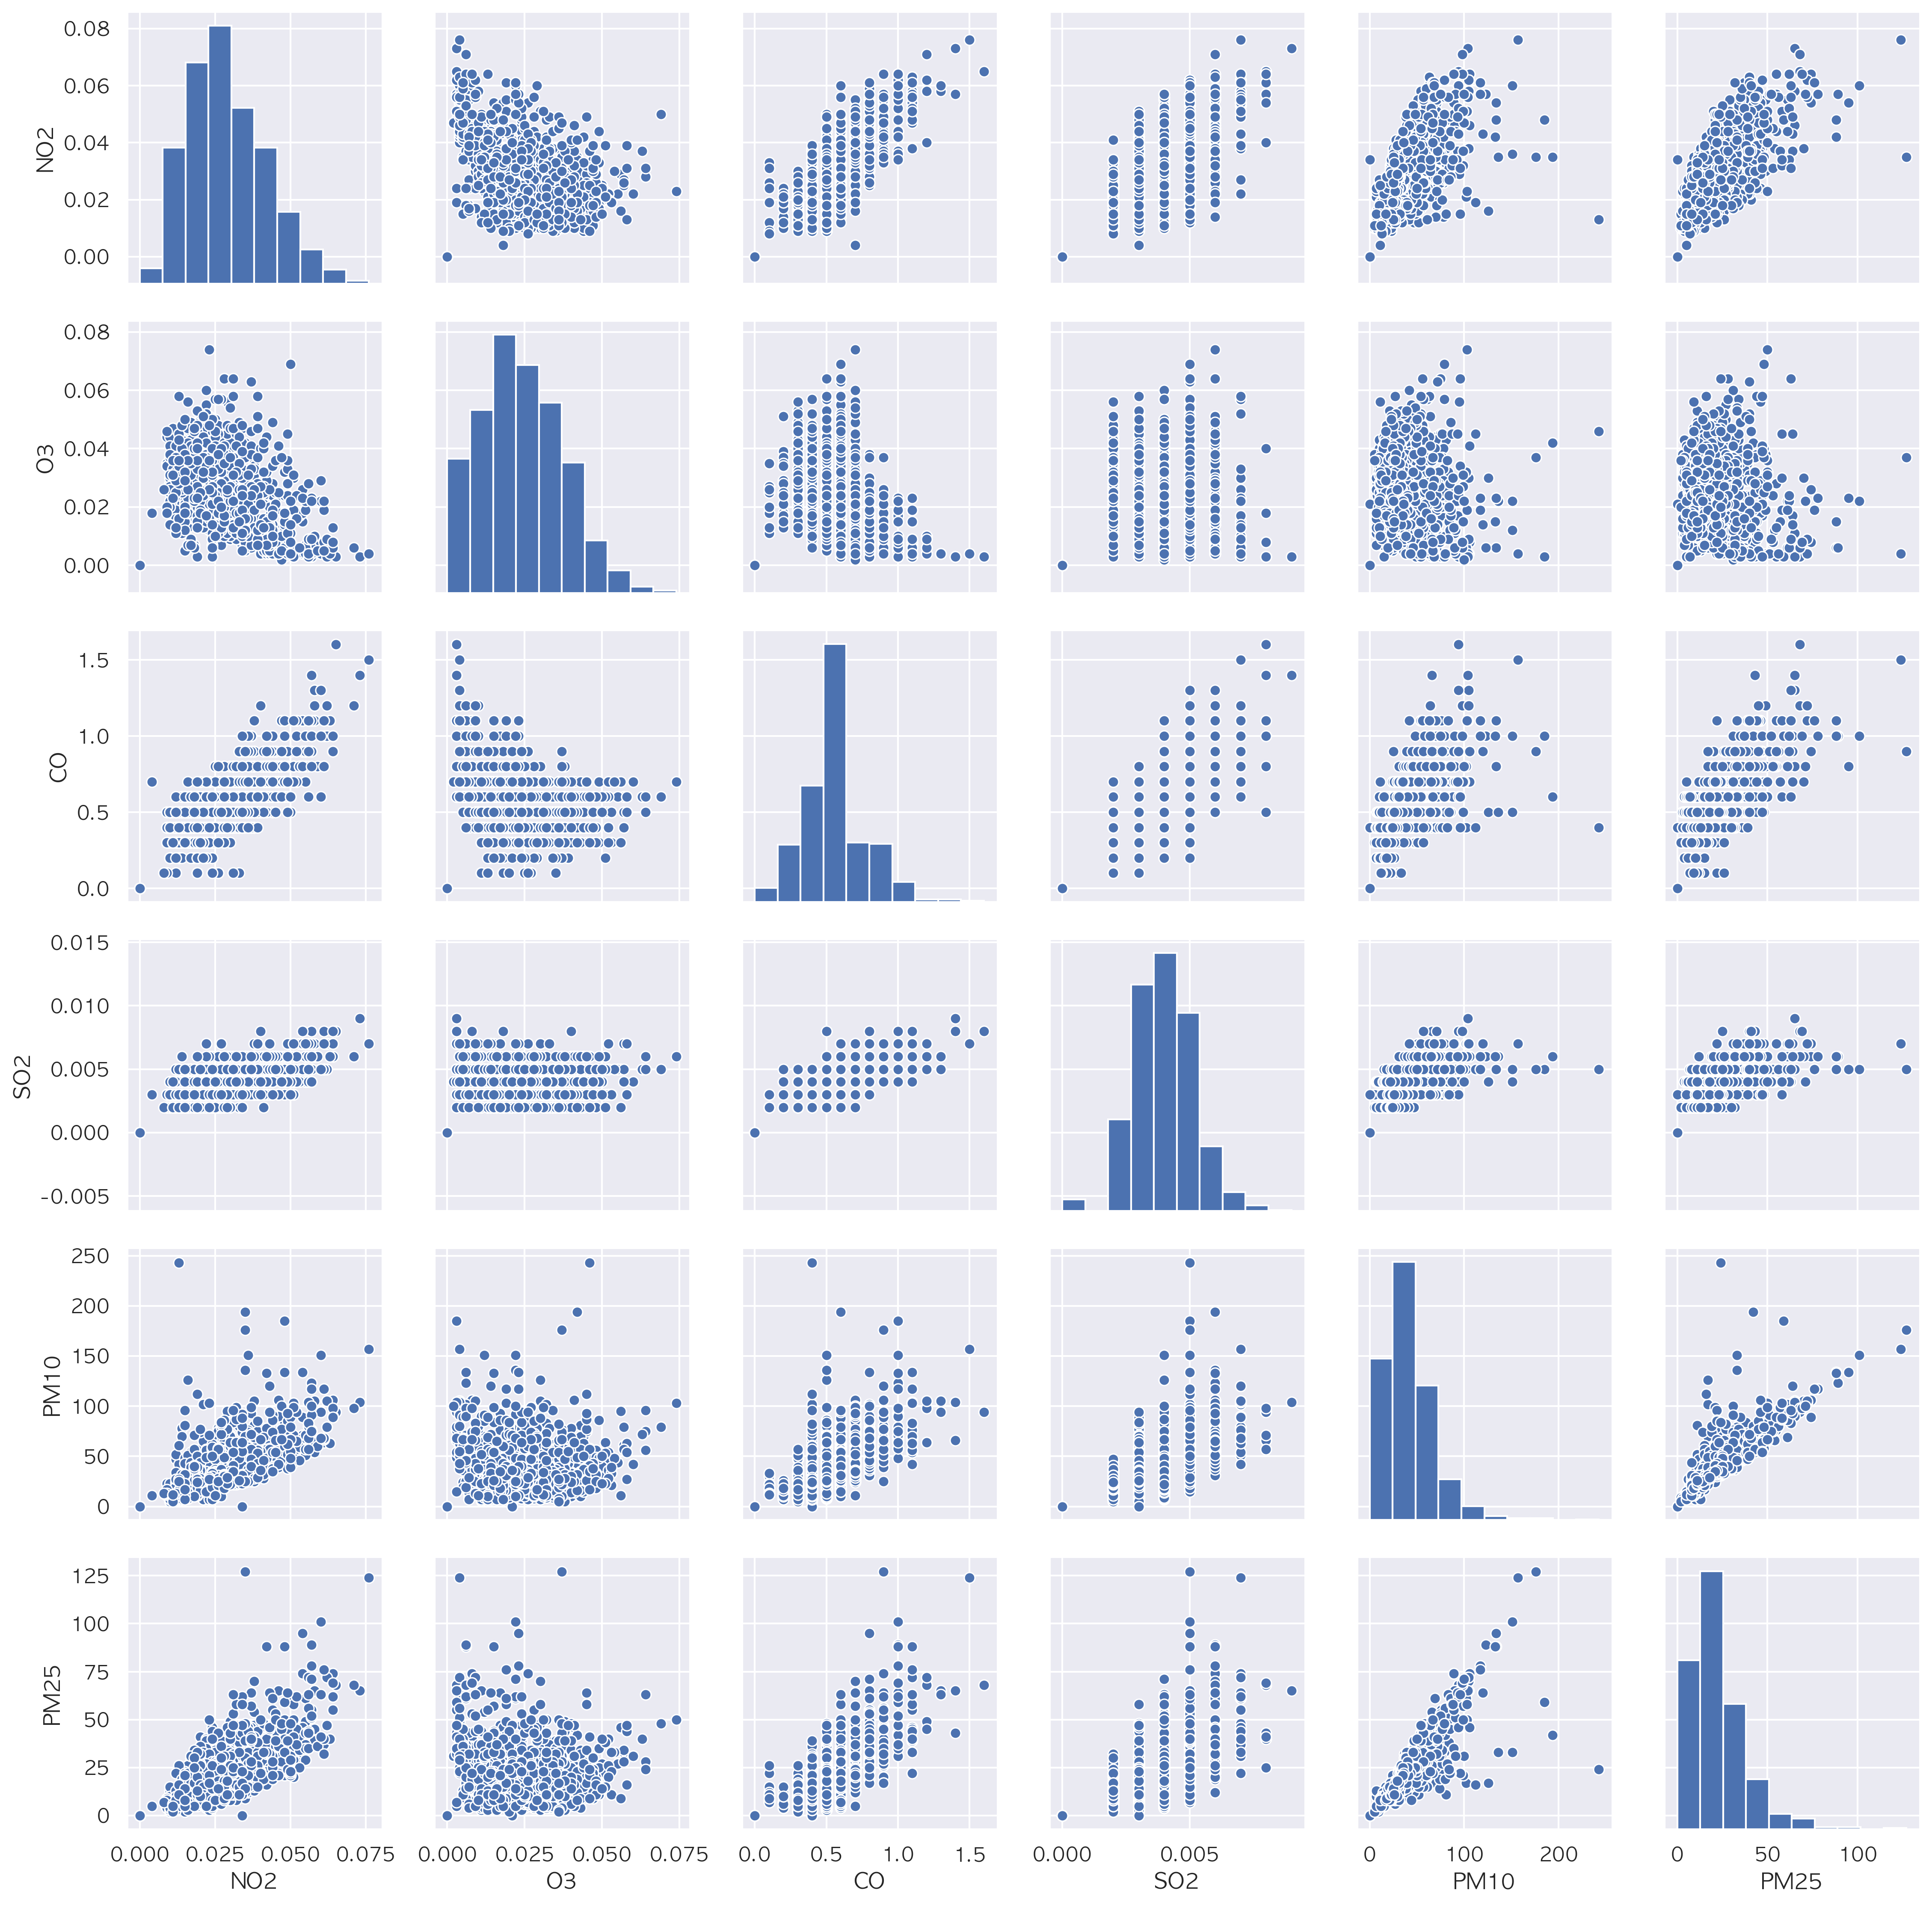

In [46]:
# 미세먼지 변수간 페어플랏
from statsmodels.datasets.longley import load_pandas

dust_x = dust.drop(["date"], axis=1)
sns.pairplot(dust_x)
plt.show()

In [55]:
# 다중공산성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dust_x.values, i) for i in range(dust_x.shape[1])]
vif["features"] = dust_x.columns
vif

,VIF Factor,features
0,17.771035,NO2
1,3.377662,O3
2,21.203334,CO
3,19.732501,SO2
4,12.503966,PM10
5,13.301013,PM25


In [56]:
dust.head()

,date,NO2,O3,CO,SO2,PM10,PM25
0,2017/01/01,0.040,0.004,1.2,0.005,64.0,49.0
1,2017/01/02,0.037,0.017,1.0,0.005,93.0,64.0
2,2017/01/03,0.038,0.017,0.9,0.006,76.0,47.0
3,2017/01/04,0.047,0.008,1.1,0.006,55.0,33.0
4,2017/01/05,0.032,0.014,0.8,0.006,31.0,19.0


In [57]:
dust = dust[["date", "O3", "PM10", "PM25"]]

In [58]:
dust

,date,O3,PM10,PM25
0,2017/01/01,0.004,64.0,49.0
1,2017/01/02,0.017,93.0,64.0
2,2017/01/03,0.017,76.0,47.0
3,2017/01/04,0.008,55.0,33.0
4,2017/01/05,0.014,31.0,19.0
...,...,...,...,...
959,2019/10/27,0.022,25.0,14.0
960,2019/10/28,0.026,29.0,18.0
961,2019/10/29,0.020,84.0,24.0
962,2019/10/30,0.015,26.0,11.0


## 2 데이터 merge

In [81]:
df = holiday.merge(climate, how='left', left_on="date", right_on="date")
df = df.merge(dust, how='left', left_on="date", right_on="date")

In [85]:
df.to_csv("datas/enviroment_jamsil.csv", index=False)